# <u color='blue'> ARIMA Time Series ForeCasting </u>
### AutoRegressive Integrated Moving Average:  It is a class of model that captures a suite of different standard temporal structures in time series data.


In [1]:
#Importing corresponding libraries required

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 16

In [2]:
import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages

##### Data: Monthly/Annual carbon dioxide emissions from electricity generation from the Energy Information Administration. Data is broken down by fuel type.
##### Source: Kaggle


In [3]:
df = pd.read_csv("Data/MER_T12_06.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5094 non-null   object
 1   YYYYMM        5094 non-null   int64 
 2   Value         5094 non-null   object
 3   Column_Order  5094 non-null   int64 
 4   Description   5094 non-null   object
 5   Unit          5094 non-null   object
dtypes: int64(2), object(4)
memory usage: 238.9+ KB


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5094 non-null   object
 1   YYYYMM        5094 non-null   int64 
 2   Value         5094 non-null   object
 3   Column_Order  5094 non-null   int64 
 4   Description   5094 non-null   object
 5   Unit          5094 non-null   object
dtypes: int64(2), object(4)
memory usage: 238.9+ KB


In [5]:
#Reading the dataset as a time series dataset by passing special arguments
'''
The arguments can be explained:

parse_dates: This is a key to identify the date time column. Example, the column name is ‘YYYYMM’.
index_col: This is a key that forces pandas to use the date time column as index.
date_parser: Converts an input string into datetime variable.

'''


dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce')
df = pd.read_csv("Data/MER_T12_06.csv", parse_dates=['YYYYMM'], index_col='YYYYMM', date_parser=dateparse) 
df.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [6]:
#Dropping the rows with null values
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts.head(15)

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-06-01,CLEIEUS,66.538,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-07-01,CLEIEUS,72.626,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-08-01,CLEIEUS,75.181,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-09-01,CLEIEUS,68.397,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [7]:
ts.dtypes

MSN             object
Value           object
Column_Order     int64
Description     object
Unit            object
dtype: object

In [8]:
#Converting Carbon emission values into numeric datatype
ts['Value'] = pd.to_numeric(ts['Value'] , errors='coerce')
ts.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [9]:
ts.dtypes

MSN              object
Value           float64
Column_Order      int64
Description      object
Unit             object
dtype: object

In [10]:
#Dropping rows with empty cells for 'Value'
ts.dropna(inplace = True)

### Time Series Dataset Visualization

In [11]:
#The dataset has 8 different sources of emission of CO2, so grouping the emission values by the emission type
Energy_sources = ts.groupby('Description')
Energy_sources.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-01-01,NNEIEUS,12.175,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,NNEIEUS,11.708,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,NNEIEUS,13.994,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,NNEIEUS,14.627,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


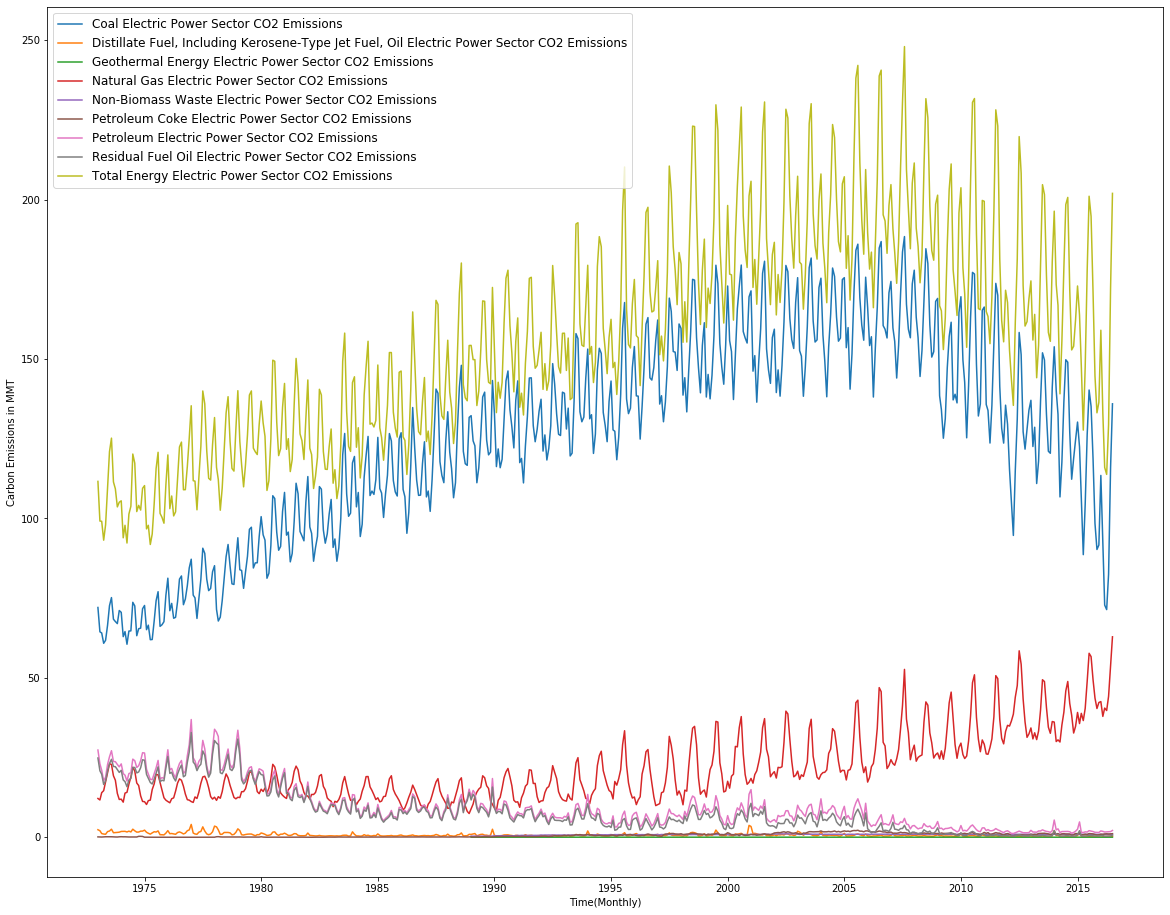

In [12]:
#Dependency of emission of power generation with time

fig, ax = plt.subplots()
for desc, group in Energy_sources:
    plt.plot(group.index, group['Value'],label=desc)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('Carbon Emissions in MMT')    
ax.legend(fontsize = 12)
plt.show()

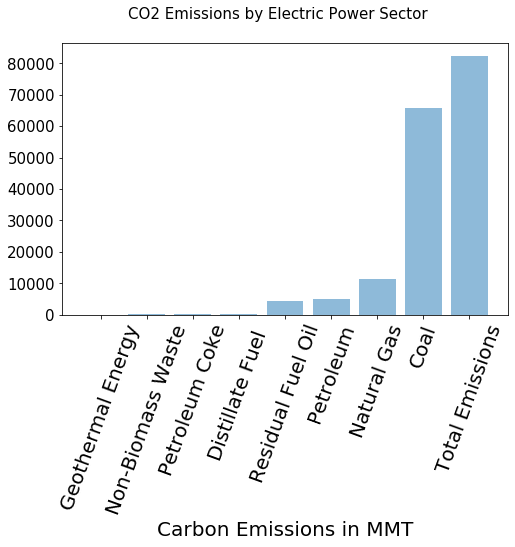

In [16]:
#Bar plot of yearly CO2 emissions by corresponding sources

CO2_per_source = ts.groupby('Description')['Value'].sum().sort_values()
cols = ['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel ',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Total Emissions']
fig = plt.figure(figsize = (8,5))
x_label = cols
x_tick = np.arange(len(cols))
plt.bar(x_tick, CO2_per_source, align = 'center', alpha = 0.5)
fig.suptitle("CO2 Emissions by Electric Power Sector", fontsize= 15)
plt.xticks(x_tick, x_label, rotation = 70, fontsize = 20)
plt.yticks(fontsize = 15)
plt.xlabel('Carbon Emissions in MMT', fontsize = 20)
plt.show()



For developing the time series model and make forcasting, we will use the natural gas CO2 emission from the electrical power generetion. First, let us slice this data as follows:


In [19]:
Emissions = ts.iloc[:,1:]   # Monthly total emissions (mte)
Emissions= Emissions.groupby(['Description', pd.Grouper(freq = 'M')])['Value'].sum().unstack(level = 0)
mte = Emissions['Natural Gas Electric Power Sector CO2 Emissions'] # monthly total emissions (mte)
mte.head()

YYYYMM
1973-01-31    12.175
1973-02-28    11.708
1973-03-31    13.994
1973-04-30    14.627
1973-05-31    17.344
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

First, we will create a plot of the time series data at hand so that we can get an idea of the overall seasonality of the series. After trend and seasonality are assessed if they are present in the dataset, they will be removed from the series to transform the nonstationary dataset into stationary and the residuals are further analyzed. 

In [20]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

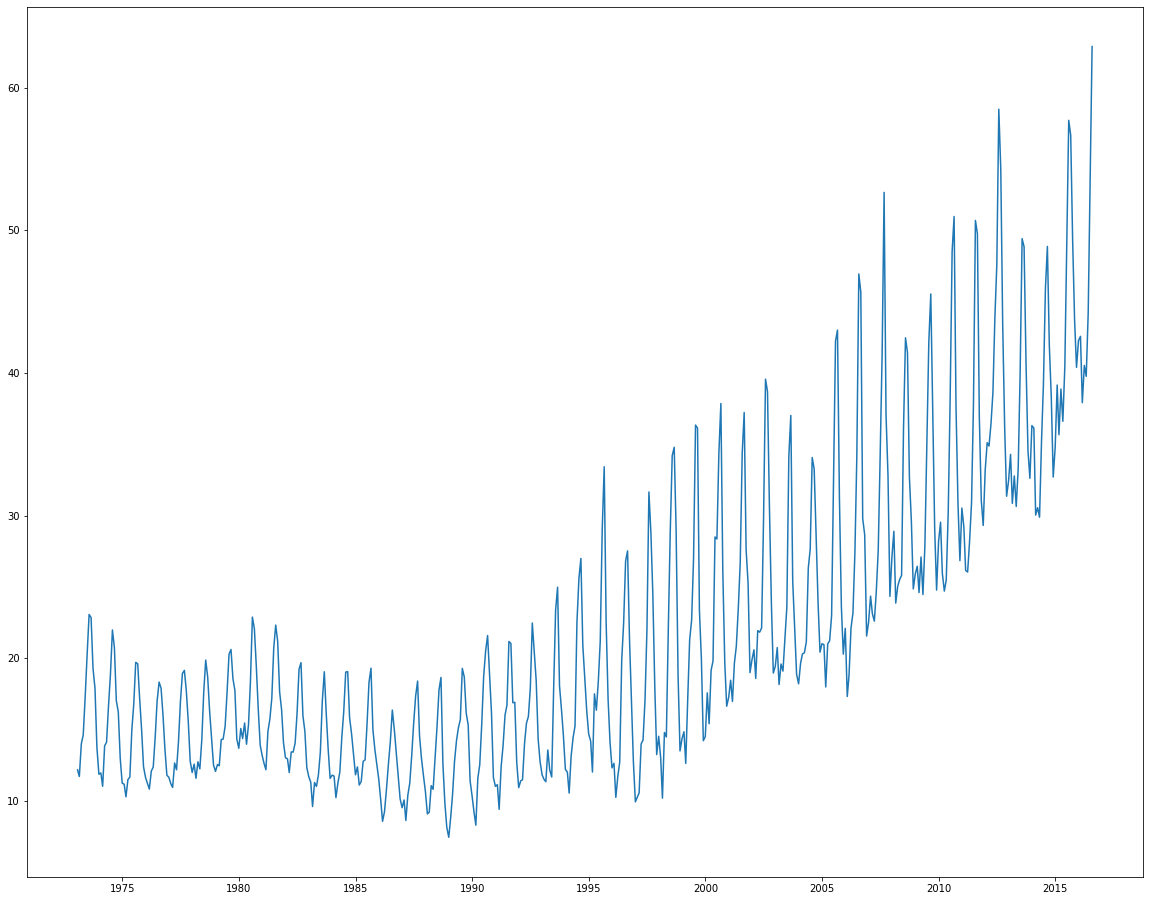

In [21]:
plt.plot(mte)

There is evident seasonal variation in the dataset and hence it can be said that the data is not stationary
 
### Dickey-Fuller Test for stationarity

In [38]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()    
    
    fig = plt.figure(figsize = (15,8))
    fig.suptitle("CO2 Emissions by Electric Power Sector", fontsize= 15)
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    
    plt.xlabel('Time in Years', fontsize = 15)
    plt.ylabel('Total Emissions', fontsize = 15)
    plt.legend(loc='best', fontsize = 15)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 15)
    plt.show(block= True)

In [36]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

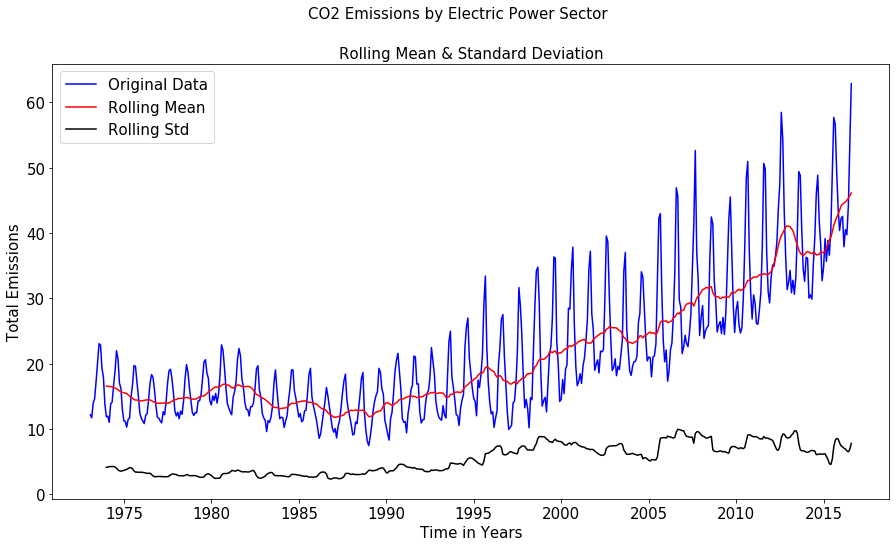

In [39]:
TestStationaryPlot(mte)

Now we will be transforming this data into stationary


The most common techniques used to estimate or model trend and then remove it from the time series are

    Aggregation – taking average for a time period like monthly/weekly average
    Smoothing – taking rolling averages
    Polynomial Fitting – fit a regression model



### Moving Average

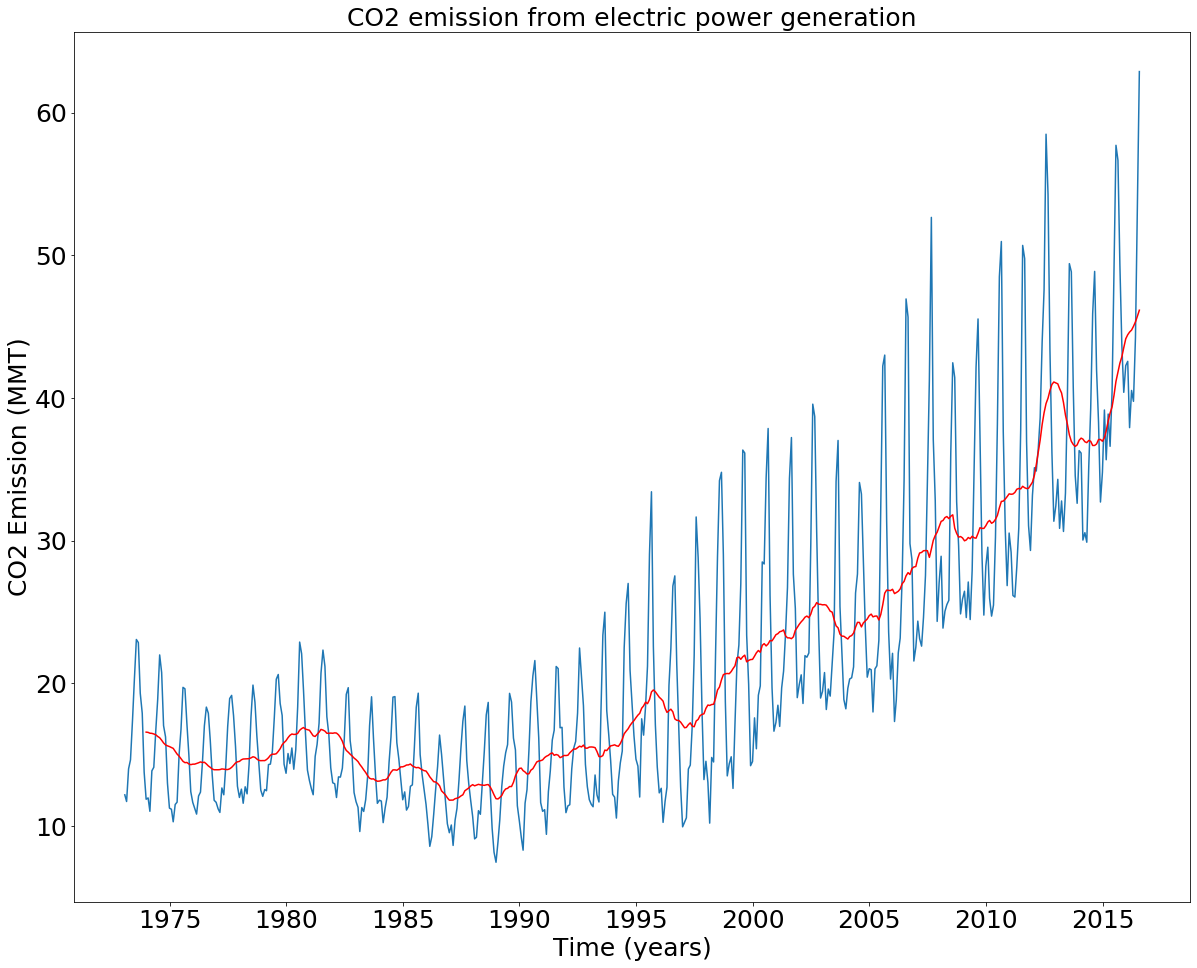

In [40]:
moving_avg = mte.rolling(12).mean()
plt.plot(mte)
plt.plot(moving_avg, color='red')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Time (years)', fontsize = 25)
plt.ylabel('CO2 Emission (MMT)', fontsize = 25)
plt.title('CO2 emission from electric power generation', fontsize = 25)
plt.show()

In [42]:
mte_moving_avg_diff = mte - moving_avg
mte_moving_avg_diff.head(13)

YYYYMM
1973-01-31         NaN
1973-02-28         NaN
1973-03-31         NaN
1973-04-30         NaN
1973-05-31         NaN
1973-06-30         NaN
1973-07-31         NaN
1973-08-31         NaN
1973-09-30         NaN
1973-10-31         NaN
1973-11-30         NaN
1973-12-31   -4.705333
1974-01-31   -4.594333
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

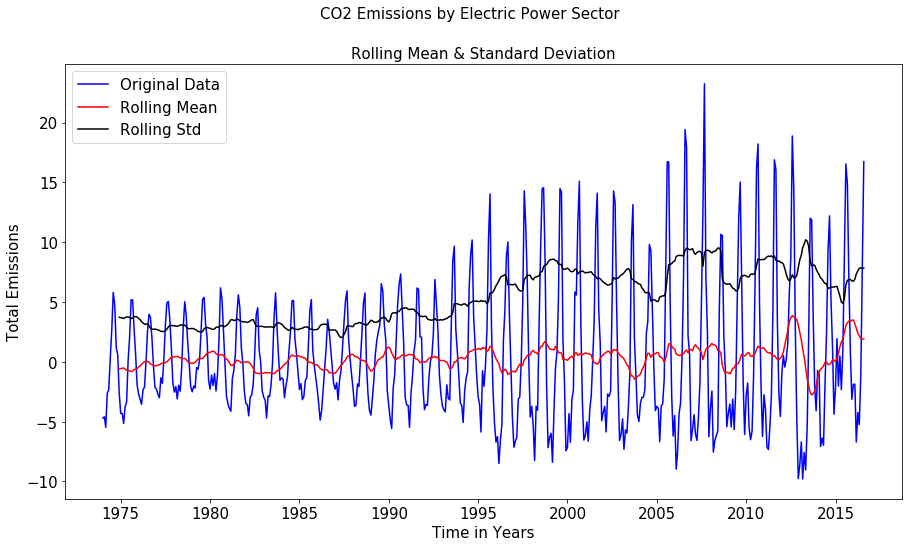

In [43]:
mte_moving_avg_diff.dropna(inplace=True)
TestStationaryPlot(mte_moving_avg_diff)

In [44]:
TestStationaryAdfuller(mte_moving_avg_diff)

Test Statistic                  -5.138977
p-value                          0.000012
#Lags Used                      19.000000
Number of Observations Used    492.000000
Critical Value (1%)             -3.443711
Critical Value (5%)             -2.867432
Critical Value (10%)            -2.569908
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


### Eliminating Trend and seasonality: Differncing

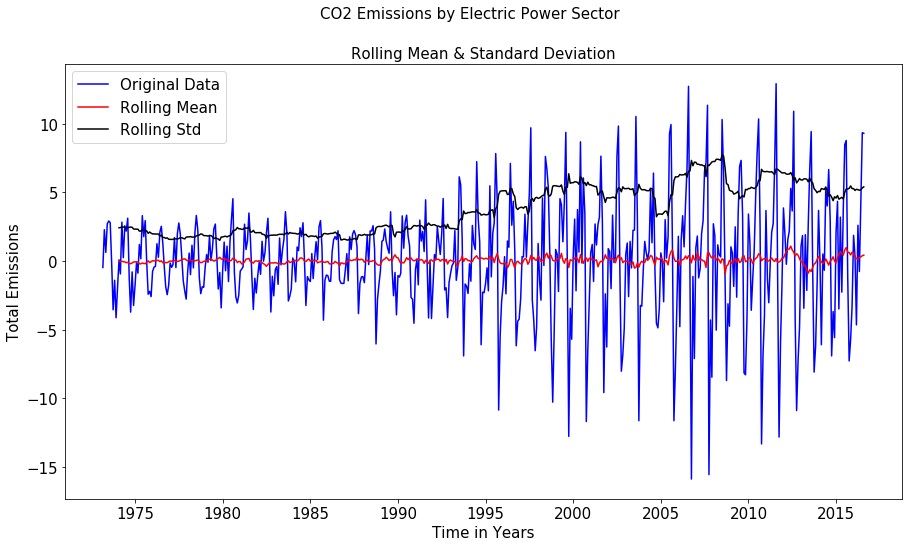

In [47]:
mte_first_difference = mte - mte.shift(1)  
TestStationaryPlot(mte_first_difference.dropna(inplace=False))


In [48]:
TestStationaryAdfuller(mte_first_difference.dropna(inplace=False))

Test Statistic                  -5.435116
p-value                          0.000003
#Lags Used                      18.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


### Removing seasonality of data

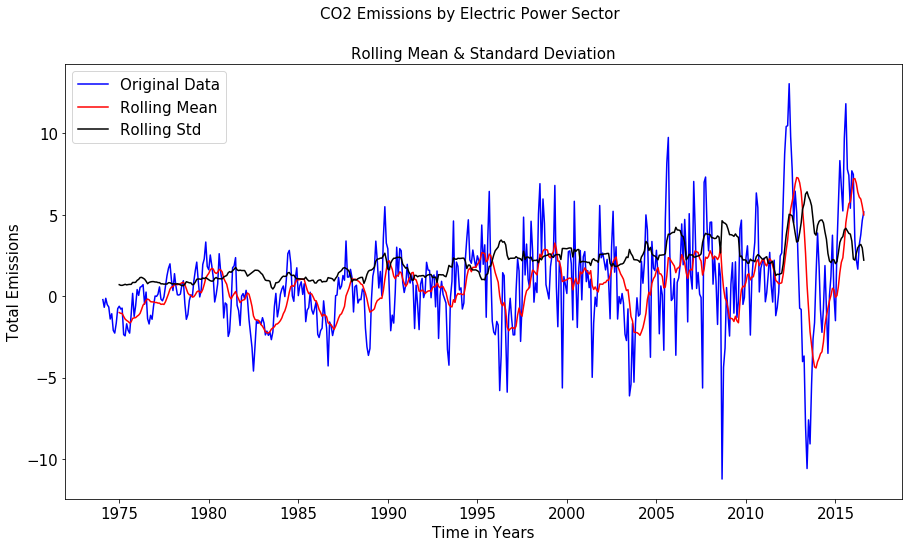

Test Statistic                  -4.412396
p-value                          0.000282
#Lags Used                      13.000000
Number of Observations Used    497.000000
Critical Value (1%)             -3.443576
Critical Value (5%)             -2.867373
Critical Value (10%)            -2.569877
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [49]:
mte_seasonal_difference = mte - mte.shift(12)  
TestStationaryPlot(mte_seasonal_difference.dropna(inplace=False))
TestStationaryAdfuller(mte_seasonal_difference.dropna(inplace=False))

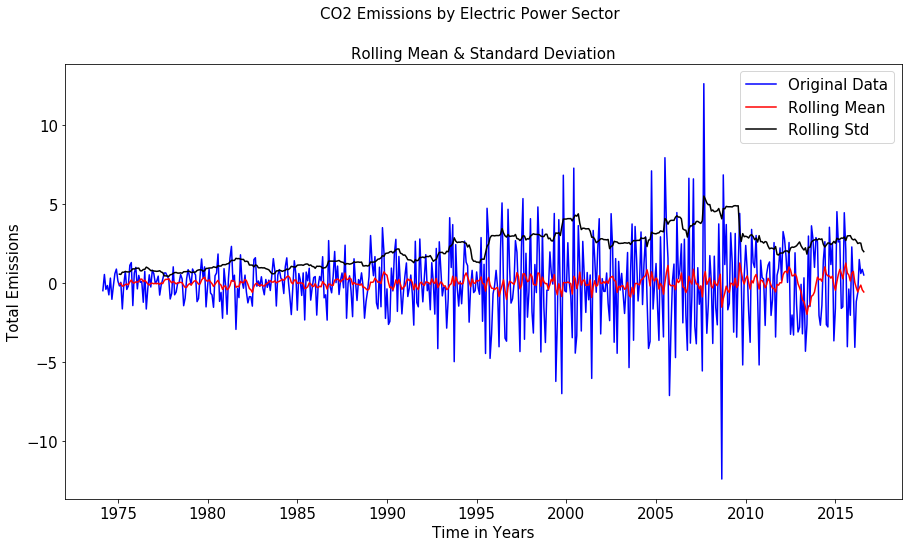

In [50]:
mte_seasonal_first_difference = mte_first_difference - mte_first_difference.shift(12)  
TestStationaryPlot(mte_seasonal_first_difference.dropna(inplace=False))

In [51]:
TestStationaryAdfuller(mte_seasonal_first_difference.dropna(inplace=False))

Test Statistic                -1.009743e+01
p-value                        1.081539e-17
#Lags Used                     1.200000e+01
Number of Observations Used    4.970000e+02
Critical Value (1%)           -3.443576e+00
Critical Value (5%)           -2.867373e+00
Critical Value (10%)          -2.569877e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


## Now we will find optimal parameters by constructing ACF and PACF charts and build our SARIMA model


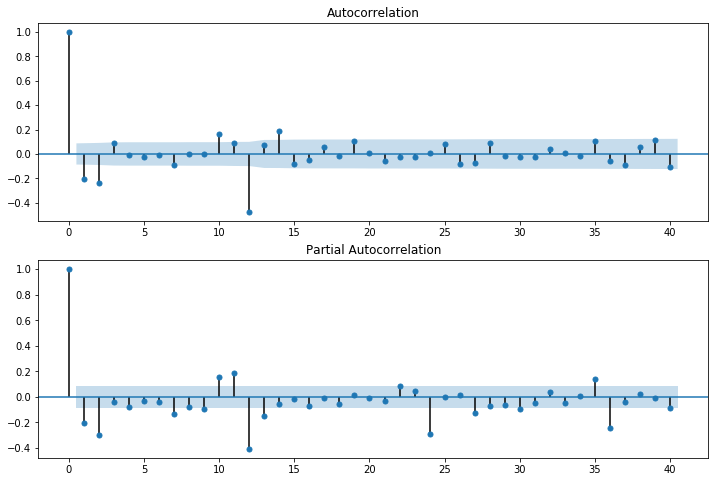

In [52]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax2)

### We will select the optimal parameter values systematically using the grid search (hyperparameter optimization) method.

In [53]:
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))

Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)


The order argument specifies the (p, d, q) parameters, while the seasonal_order argument specifies the (P, D, Q, S) seasonal component of the Seasonal ARIMA model. After fitting each SARIMAX()model, the code prints out its respective AIC score.

In [54]:
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(mte,
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [55]:
mod = sm.tsa.statespace.SARIMAX(mte, 
                                order=(1,1,1), 
                                seasonal_order=(0,1,1,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                              SARIMAX Results                                              
Dep. Variable:     Natural Gas Electric Power Sector CO2 Emissions   No. Observations:                  523
Model:                              SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -997.777
Date:                                             Tue, 29 Sep 2020   AIC                           2003.553
Time:                                                     15:29:34   BIC                           2020.380
Sample:                                                 01-31-1973   HQIC                          2010.158
                                                      - 07-31-2016                                         
Covariance Type:                                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

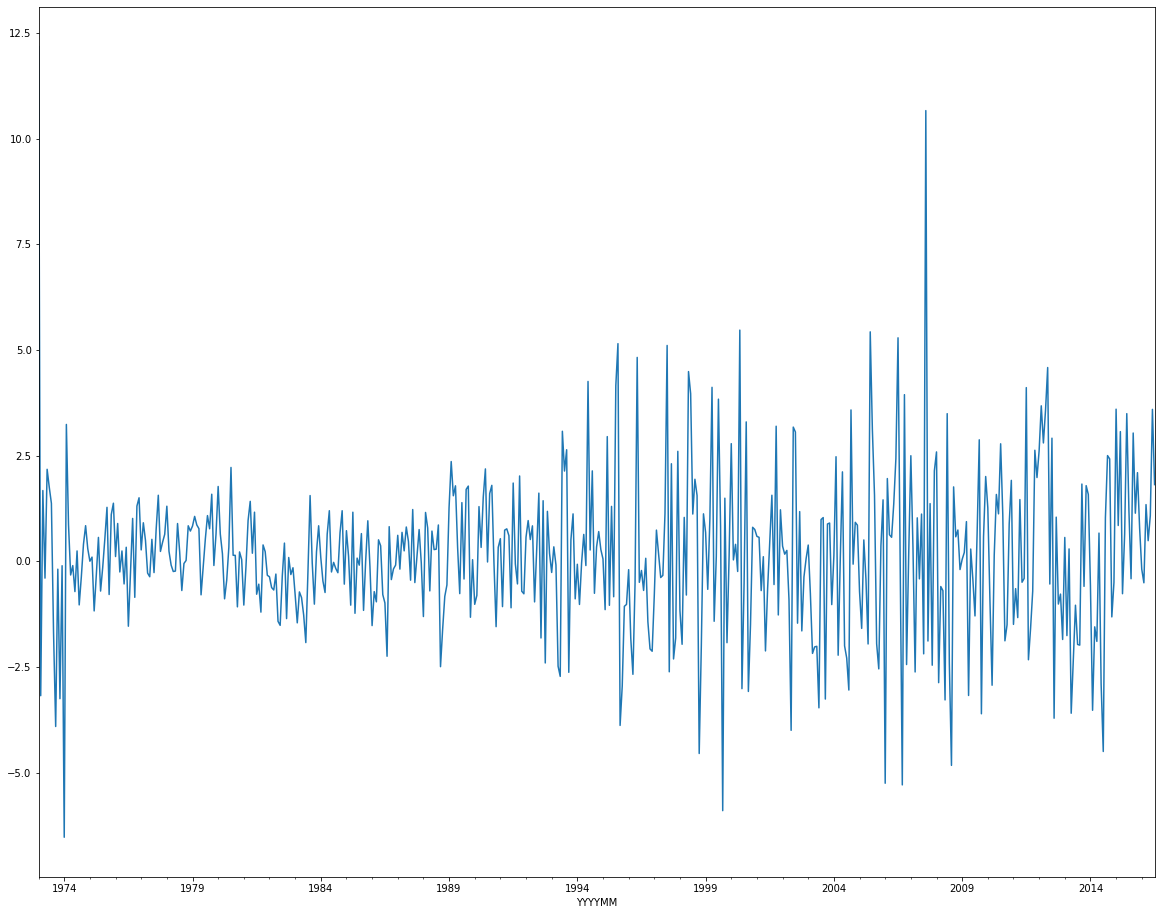

In [56]:
results.resid.plot()

In [57]:
print(results.resid.describe())

count    523.000000
mean       0.144267
std        1.885626
min       -6.528428
25%       -0.791260
50%        0.126975
75%        1.040648
max       12.175000
dtype: float64


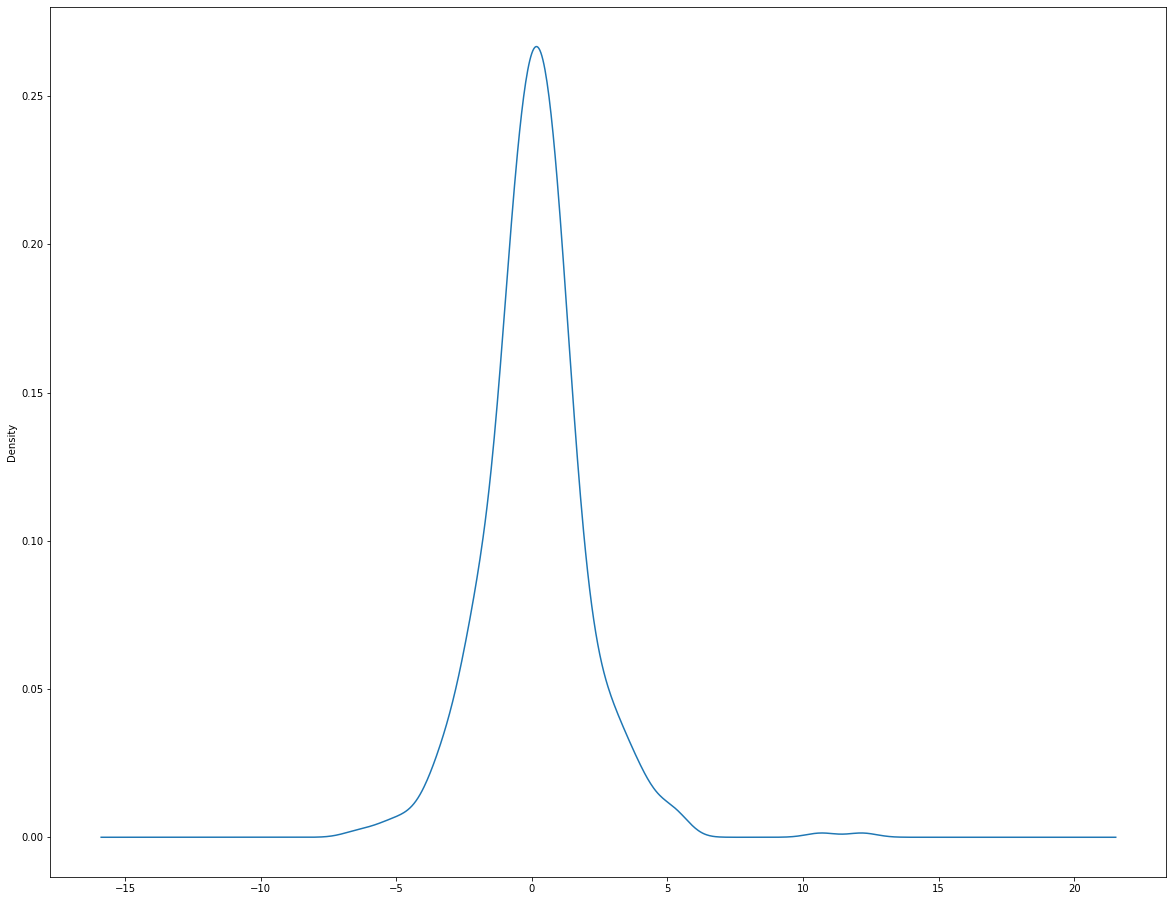

In [58]:
results.resid.plot(kind='kde')

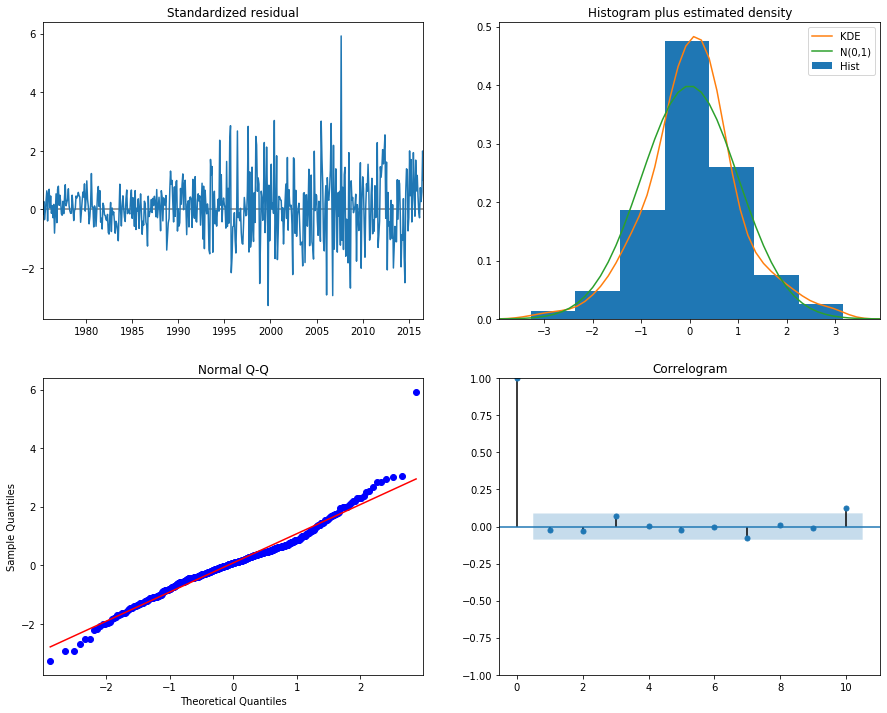

In [59]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [60]:
pred = results.get_prediction(start = 480, end = 523, dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

,lower Natural Gas Electric Power Sector CO2 Emissions,upper Natural Gas Electric Power Sector CO2 Emissions
2013-01-31,30.203839,37.257328
2013-02-28,29.088383,36.141873
2013-03-31,28.958989,36.012478
2013-04-30,30.708076,37.761565
2013-05-31,32.104083,39.157572


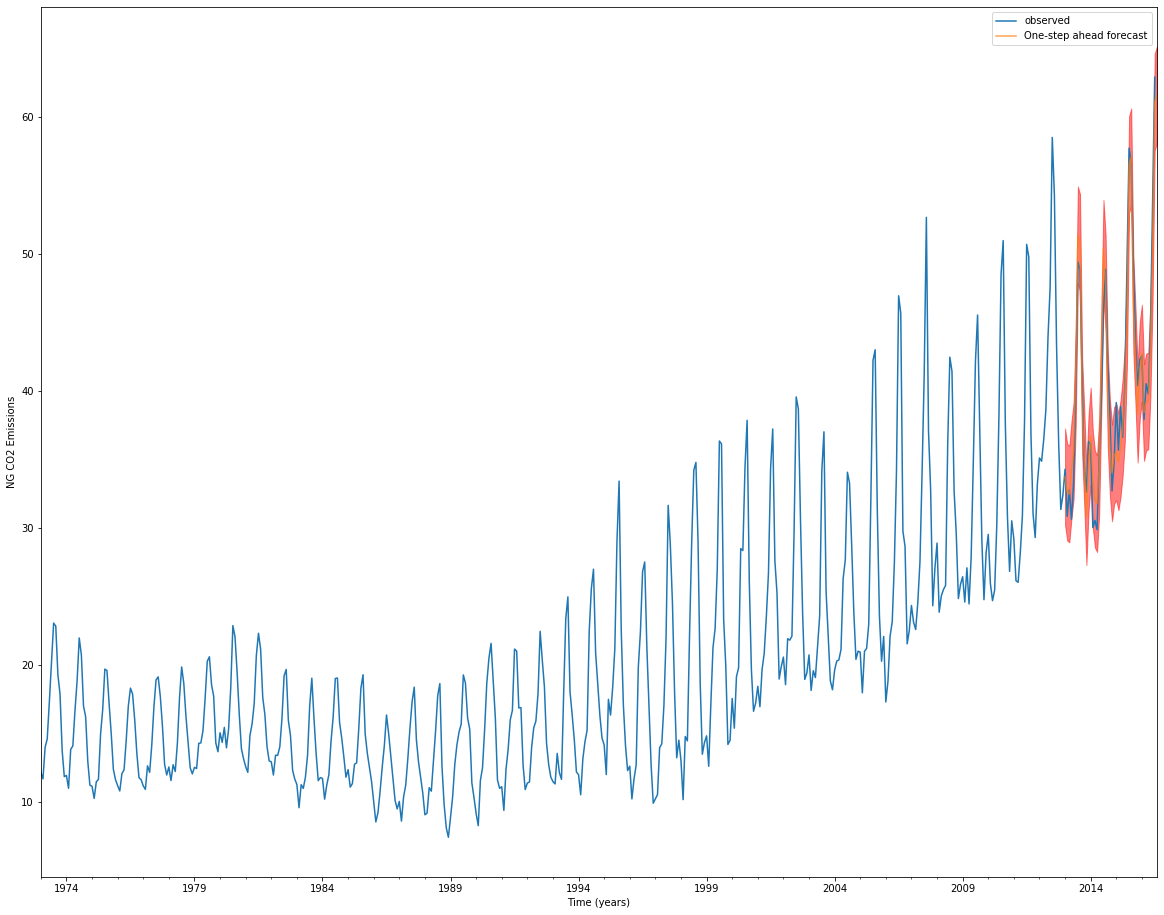

In [61]:
ax = mte['1973':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('NG CO2 Emissions')
plt.legend()

plt.show()



In [62]:
mte_forecast = pred.predicted_mean
mte_truth = mte['2013-01-31':]

# Compute the mean square error
mse = ((mte_forecast - mte_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_truth)**2)/len(mte_forecast))))

The Mean Squared Error (MSE) of the forecast is 4.09
The Root Mean Square Error (RMSE) of the forcast: nan


In [63]:
mte_pred_concat = pd.concat([mte_truth, mte_forecast])

In [64]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2013-01-31'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

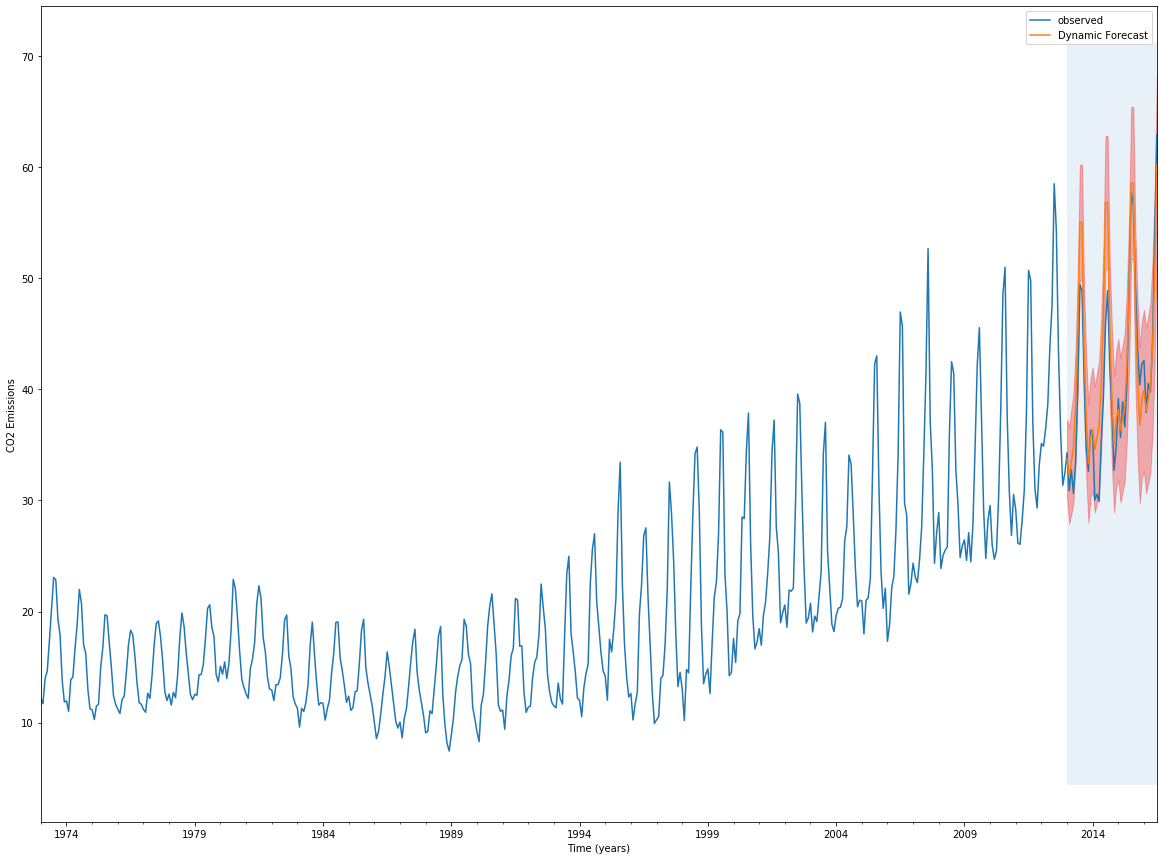

In [65]:
ax = mte['1973':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], 
                color='r', 
                alpha=.3)

ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2013-01-31'), 
                 mte.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('CO2 Emissions')

plt.legend()
plt.show()

In [66]:
# Extract the predicted and true values of our time series
mte_forecast = pred_dynamic.predicted_mean
mte_orginal = mte['2013-01-31':]

# Compute the mean square error
mse = ((mte_forecast - mte_orginal) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_orginal)**2)/len(mte_forecast))))

The Mean Squared Error (MSE) of the forecast is 14.39
The Root Mean Square Error (RMSE) of the forcast: 3.7936


In [67]:
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps= 120)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci.head()

,lower Natural Gas Electric Power Sector CO2 Emissions,upper Natural Gas Electric Power Sector CO2 Emissions
2016-08-31,58.062560,65.116050
2016-09-30,47.316617,55.987496
2016-10-31,40.736076,50.163096
2016-11-30,36.175929,46.010290
2016-12-31,38.095118,48.172702


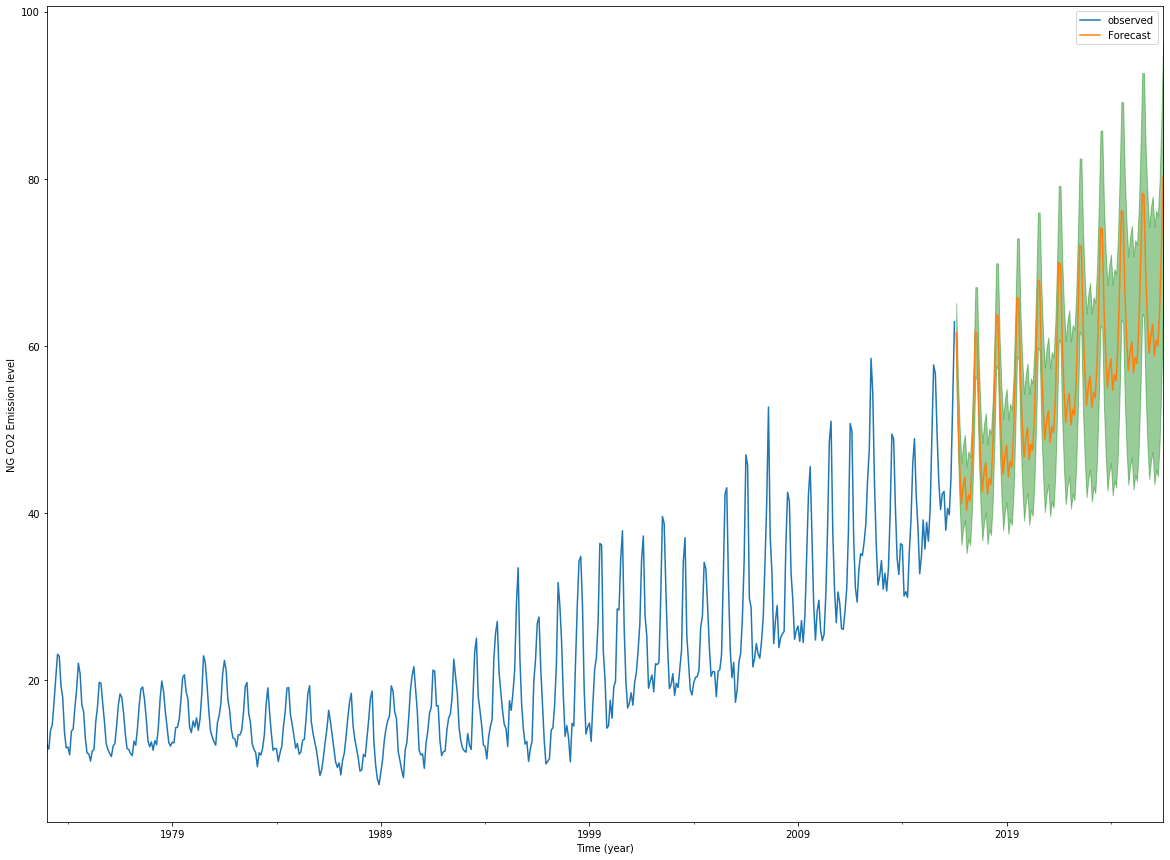

In [70]:
ax = mte.plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('NG CO2 Emission level')

plt.legend()
plt.show()

In [71]:
mte_forecast



YYYYMM
2013-01-31    33.730583
2013-02-28    32.212300
2013-03-31    33.447260
2013-04-30    34.724181
2013-05-31    38.570143
2013-06-30    44.827334
2013-07-31    54.992050
2013-08-31    55.008796
2013-09-30    43.594902
2013-10-31    37.504646
2013-11-30    33.293362
2013-12-31    35.588444
2014-01-31    36.412718
2014-02-28    34.578737
2014-03-31    35.602682
2014-04-30    36.738559
2014-05-31    40.490246
2014-06-30    46.684422
2014-07-31    56.807018
2014-08-31    56.795611
2014-09-30    45.362899
2014-10-31    39.260065
2014-11-30    35.040373
2014-12-31    37.329836
2015-01-31    38.150353
2015-02-28    36.313863
2015-03-31    37.336129
2015-04-30    38.470885
2015-05-31    42.221821
2015-06-30    48.415496
2015-07-31    58.537757
2015-08-31    58.526127
2015-09-30    47.093265
2015-10-31    40.990331
2015-11-30    36.770573
2015-12-31    39.059991
2016-01-31    39.880478
2016-02-29    38.043967
2016-03-31    39.066220
2016-04-30    40.200967
2016-05-31    43.951898
2016-06-3

In [105]:

lstmdata= mte[:'2013-01-31'] 
lstmdata.append(mte_forecast)

YYYYMM
1973-01-31    12.175000
1973-02-28    11.708000
1973-03-31    13.994000
1973-04-30    14.627000
1973-05-31    17.344000
                ...    
2016-03-31    39.066220
2016-04-30    40.200967
2016-05-31    43.951898
2016-06-30    50.145569
2016-07-31    60.267827
Length: 524, dtype: float64

In [129]:
lstm_dataset = lstmdata.to_frame()
lstm_dataset

,Natural Gas Electric Power Sector CO2 Emissions
YYYYMM,
1973-01-31,12.175
1973-02-28,11.708
1973-03-31,13.994
1973-04-30,14.627
1973-05-31,17.344
...,...
2012-09-30,43.384
2012-10-31,36.176
2012-11-30,31.355


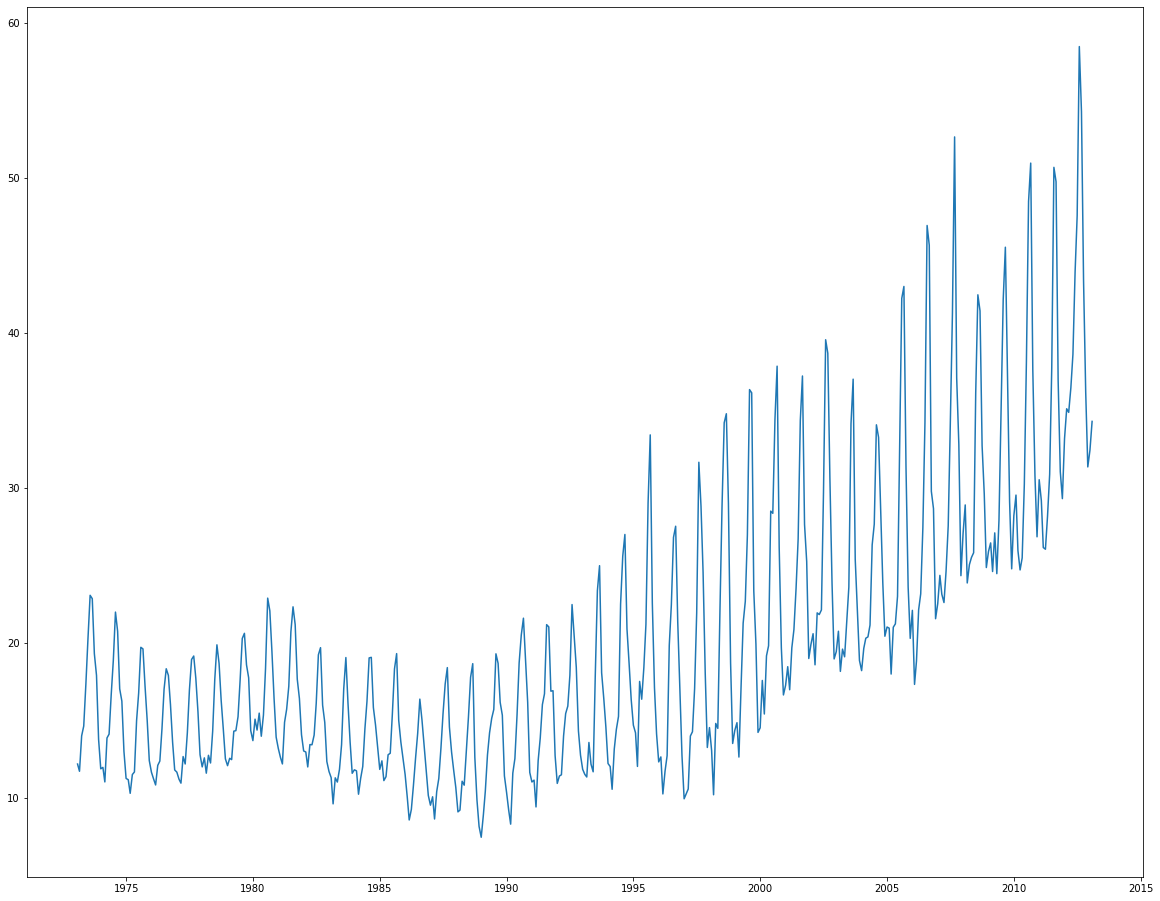

In [130]:
plt.plot(lstm_dataset)
plt.show()

In [107]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [108]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [131]:
data = lstm_dataset['Natural Gas Electric Power Sector CO2 Emissions']

In [168]:
dataset = lstm_dataset.values
dataset = dataset.astype('float32')

In [179]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [180]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

322 159


In [181]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [182]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [183]:
testX

array([[0.13263589],
       [0.138435  ],
       [0.19832686],
       [0.15589124],
       [0.22941893],
       [0.24217314],
       [0.41248384],
       [0.40970185],
       [0.5284668 ],
       [0.5958035 ],
       [0.36658046],
       [0.23978293],
       [0.18000862],
       [0.19203794],
       [0.21572432],
       [0.18659145],
       [0.23956743],
       [0.2625485 ],
       [0.31478   ],
       [0.37741467],
       [0.527213  ],
       [0.58338225],
       [0.3955762 ],
       [0.34879118],
       [0.22608835],
       [0.2438384 ],
       [0.25743505],
       [0.21809492],
       [0.2837663 ],
       [0.28167003],
       [0.28748873],
       [0.43638572],
       [0.6292269 ],
       [0.6121626 ],
       [0.45489988],
       [0.3212061 ],
       [0.22555935],
       [0.23478702],
       [0.26056972],
       [0.2098076 ],
       [0.23794132],
       [0.22822383],
       [0.27212882],
       [0.31638652],
       [0.52294195],
       [0.5793661 ],
       [0.35135773],
       [0.288

In [184]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [185]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
320/320 - 0s - loss: 0.0153
Epoch 2/100
320/320 - 0s - loss: 0.0090
Epoch 3/100
320/320 - 0s - loss: 0.0082
Epoch 4/100
320/320 - 0s - loss: 0.0073
Epoch 5/100
320/320 - 0s - loss: 0.0064
Epoch 6/100
320/320 - 0s - loss: 0.0055
Epoch 7/100
320/320 - 0s - loss: 0.0046
Epoch 8/100
320/320 - 0s - loss: 0.0040
Epoch 9/100
320/320 - 0s - loss: 0.0035
Epoch 10/100
320/320 - 0s - loss: 0.0032
Epoch 11/100
320/320 - 0s - loss: 0.0030
Epoch 12/100
320/320 - 0s - loss: 0.0030
Epoch 13/100
320/320 - 0s - loss: 0.0029
Epoch 14/100
320/320 - 0s - loss: 0.0030
Epoch 15/100
320/320 - 0s - loss: 0.0029
Epoch 16/100
320/320 - 0s - loss: 0.0029
Epoch 17/100
320/320 - 0s - loss: 0.0029
Epoch 18/100
320/320 - 0s - loss: 0.0029
Epoch 19/100
320/320 - 0s - loss: 0.0029
Epoch 20/100
320/320 - 0s - loss: 0.0029
Epoch 21/100
320/320 - 0s - loss: 0.0029
Epoch 22/100
320/320 - 0s - loss: 0.0029
Epoch 23/100
320/320 - 0s - loss: 0.0029
Epoch 24/100
320/320 - 0s - loss: 0.0029
Epoch 25/100
320/320 - 0s

In [186]:


# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.05 RMSE
Test Score: 0.12 RMSE


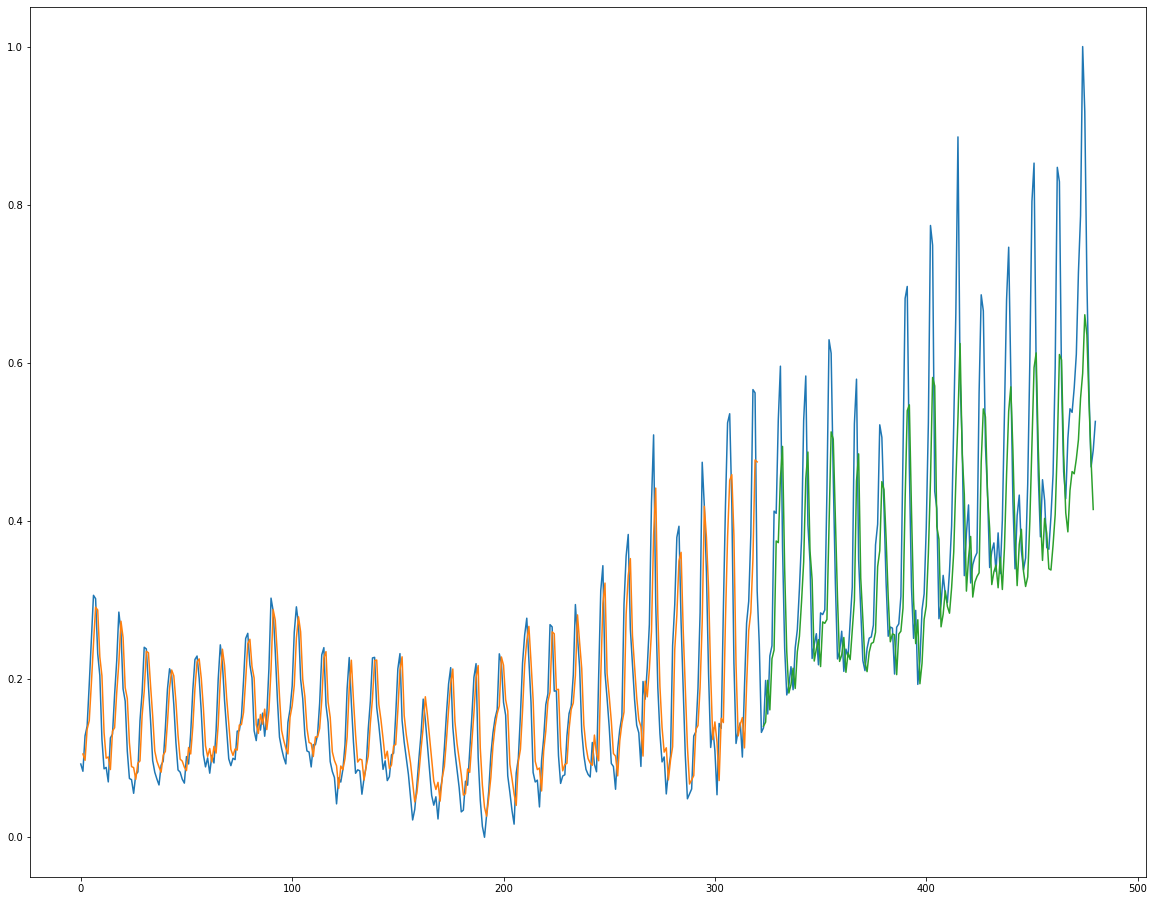

In [187]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()